# EDA

In [1]:
import pandas as pd

In [52]:
data = pd.read_csv('cleaned_data.csv')
data

,Unnamed: 0,external_mall_id,block_id,average_dwell_time,median_dwell_time,store_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,...,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area,service_charges_r12m,marketing_costs_r12m,real_estate_taxes_r12m,maintenance_works_r12m
0,0,18,11273,249.520051,180.0,9257.0,9810.25,472952.50,509.62,24568.96,...,Jewellery,Jewellery & Watches,Modern Jewellery & Watches,886377.00,NaN,104.0,25034.0,0.0,11957.0,6337.0
1,1,18,11271,190.005359,120.0,9443.0,4891.25,362107.00,254.09,18810.75,...,Fashion apparel,Family Fashion,Family Fashion,20883319.00,NaN,203.0,33465.0,0.0,11957.0,6337.0
2,2,17,4319,1325.216860,780.0,5697.0,1981.23,280719.08,70.37,9970.90,...,Services,Imaterial services,Travel Agency,2339819.57,140492.0,72.0,18000.0,980.0,11957.0,6337.0
3,3,36,1201,621.422549,240.0,7179.0,29753.50,751216.75,1226.95,30978.01,...,Food & Beverage Services,Sweet moments,Confectionery,1129538.00,89064.0,107.0,80035.0,5038.0,11957.0,24846.0
4,4,36,1212,217.833860,120.0,7288.0,6082.50,357884.00,253.44,14911.83,...,Fashion apparel,Men's Fashion,Men's Fashion,340091.00,2181010.0,208.0,69226.0,0.0,11957.0,6337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,3665,18,11264,255.038595,180.0,9407.0,14430.50,510585.25,749.64,26523.91,...,Home,Furniture & Interior Design,Tableware and kitchen tools,NaN,115075.0,175.0,72222.0,0.0,11957.0,6337.0
3642,3666,10,4706,294.363131,240.0,1171.0,3774.85,343803.85,134.08,12211.61,...,Food & Beverage Services,Gourmet Food Products,"Herbal, spices and tea products",1469703.00,270969.0,44.5,7274.0,3841.0,44342.0,6337.0
3643,3667,17,4271,316.565137,180.0,5829.0,11781.00,1529175.00,418.45,54314.96,...,Bags & Footwear & Accessories,Accessories,"Mixed: small accessories, bags and fancy jewel...",NaN,NaN,83.0,1466.0,0.0,11957.0,6337.0
3644,3668,10,4535,699.828561,540.0,1391.0,38032.69,196593.23,1350.89,6982.82,...,Culture & Media & Technology,"Books, Music & Multimedia",Bookstore & stationery,66591.00,126061.0,732.3,24474.0,4211.0,14051.0,6337.0


## time features

convert the store open and close date to datetime, get the number of days the store lived until today

In [54]:
data['store_year_opened'] = pd.to_datetime(data['store_year_opened'], format='%d/%m/%Y')
data['store_year_closed'] = pd.to_datetime(data['store_year_closed'], format='%d/%m/%Y', errors='coerce')  # Coerce errors for any invalid or missing entries

In [55]:
from datetime import datetime

today = pd.to_datetime(datetime.now().strftime('%d/%m/%Y'))

data['living_days'] = data.apply(
    lambda row: (row['store_year_closed'] - row['store_year_opened']).days if pd.notnull(row['store_year_closed']) and row['store_year_closed']< pd.Timestamp('2099-01-01') else (today - row['store_year_opened']).days,
    axis=1
)

<ipython-input-55-4e16207ef7d5>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  today = pd.to_datetime(datetime.now().strftime('%d/%m/%Y'))


## Initial data overview

In [57]:
data

,Unnamed: 0,external_mall_id,block_id,average_dwell_time,median_dwell_time,store_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,...,store_sales_r12m,store_rent_r12m,store_area,service_charges_r12m,marketing_costs_r12m,real_estate_taxes_r12m,maintenance_works_r12m,visit_to_window_flow_ratio,sales_to_rent_ratio,living_days
0,0,18,11273,249.520051,180.0,9257.0,9810.25,472952.50,509.62,24568.96,...,886377.00,NaN,104.0,25034.0,0.0,11957.0,6337.0,0.020743,NaN,1948
1,1,18,11271,190.005359,120.0,9443.0,4891.25,362107.00,254.09,18810.75,...,20883319.00,NaN,203.0,33465.0,0.0,11957.0,6337.0,0.013508,NaN,972
2,2,17,4319,1325.216860,780.0,5697.0,1981.23,280719.08,70.37,9970.90,...,2339819.57,140492.0,72.0,18000.0,980.0,11957.0,6337.0,0.007058,16.654468,6236
3,3,36,1201,621.422549,240.0,7179.0,29753.50,751216.75,1226.95,30978.01,...,1129538.00,89064.0,107.0,80035.0,5038.0,11957.0,24846.0,0.039607,12.682318,2860
4,4,36,1212,217.833860,120.0,7288.0,6082.50,357884.00,253.44,14911.83,...,340091.00,2181010.0,208.0,69226.0,0.0,11957.0,6337.0,0.016996,0.155933,669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,3665,18,11264,255.038595,180.0,9407.0,14430.50,510585.25,749.64,26523.91,...,NaN,115075.0,175.0,72222.0,0.0,11957.0,6337.0,0.028263,NaN,1144
3642,3666,10,4706,294.363131,240.0,1171.0,3774.85,343803.85,134.08,12211.61,...,1469703.00,270969.0,44.5,7274.0,3841.0,44342.0,6337.0,0.010980,5.423879,3448
3643,3667,17,4271,316.565137,180.0,5829.0,11781.00,1529175.00,418.45,54314.96,...,NaN,NaN,83.0,1466.0,0.0,11957.0,6337.0,0.007704,NaN,919
3644,3668,10,4535,699.828561,540.0,1391.0,38032.69,196593.23,1350.89,6982.82,...,66591.00,126061.0,732.3,24474.0,4211.0,14051.0,6337.0,0.193459,0.528244,1238


In [14]:
data.dtypes

,0
Unnamed: 0,int64
external_mall_id,int64
block_id,int64
average_dwell_time,float64
median_dwell_time,float64
store_id,float64
store_visits_monthly_average,float64
store_window_flow_monthly_average,float64
store_visits_daily_average,float64
store_window_flow_daily_average,float64


In [15]:
data.describe()

,Unnamed: 0,external_mall_id,block_id,average_dwell_time,median_dwell_time,store_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,...,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area,service_charges_r12m,marketing_costs_r12m,real_estate_taxes_r12m,maintenance_works_r12m,living_days,total_costs_r12m
count,3646.000000,3646.000000,3646.000000,3646.000000,3646.000000,3646.000000,3646.000000,3.646000e+03,3646.000000,3646.000000,...,3646.000000,2.762000e+03,2.661000e+03,3646.000000,3.646000e+03,3646.000000,3.646000e+03,3.646000e+03,3646.000000,3.646000e+03
mean,1835.871366,20.781404,5587.304169,856.662893,543.867252,5905.183489,21605.634290,6.370229e+05,811.717512,23926.539281,...,64.996709,5.430637e+06,6.120526e+05,452.915129,3.886040e+04,5114.302249,2.268479e+04,1.789006e+04,2982.316237,8.454955e+04
min,0.000000,7.000000,2.000000,114.512500,60.000000,1.000000,0.000000,1.612000e+03,0.000000,806.000000,...,0.000000,0.000000e+00,-1.617320e+05,0.000000,-8.604200e+04,-41943.000000,-1.669500e+04,0.000000e+00,78.000000,-7.584300e+04
25%,918.250000,14.000000,4315.000000,366.714484,180.000000,1943.250000,4737.047500,3.613795e+05,180.460000,13701.950000,...,30.000000,4.995865e+05,8.446700e+04,76.750000,9.287750e+03,0.000000,1.195700e+04,6.337000e+03,1016.250000,3.267825e+04
50%,1834.500000,19.000000,5991.000000,530.873969,240.000000,5430.500000,10198.545000,5.414255e+05,386.605000,20852.855000,...,71.000000,1.154851e+06,1.734600e+05,159.030000,1.799200e+04,67.000000,1.195700e+04,6.337000e+03,2326.000000,4.614600e+04
75%,2754.750000,28.000000,7107.750000,992.054124,480.000000,9947.750000,23670.922500,7.906363e+05,885.577500,30036.367500,...,98.000000,3.149622e+06,4.320000e+05,333.850000,2.983775e+04,6768.000000,1.195700e+04,6.337000e+03,4119.000000,8.819125e+04
max,3669.000000,36.000000,13815.000000,7074.316406,6840.000000,12427.000000,444736.540000,6.131568e+06,17836.750000,217787.930000,...,121.000000,2.724081e+08,6.461468e+07,24811.000000,1.631623e+06,218914.000000,1.221859e+06,1.156896e+06,20159.000000,1.901775e+06
std,1059.734049,8.077281,2937.427663,804.041412,728.462174,3932.262524,34102.897853,4.277492e+05,1268.571819,15691.373881,...,36.479447,1.757487e+07,1.967345e+06,1286.715336,9.985694e+04,10300.685442,5.377119e+04,5.200992e+04,2687.905666,1.259435e+05


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         3646 non-null   int64         
 1   external_mall_id                   3646 non-null   int64         
 2   block_id                           3646 non-null   int64         
 3   average_dwell_time                 3646 non-null   float64       
 4   median_dwell_time                  3646 non-null   float64       
 5   store_id                           3646 non-null   float64       
 6   store_visits_monthly_average       3646 non-null   float64       
 7   store_window_flow_monthly_average  3646 non-null   float64       
 8   store_visits_daily_average         3646 non-null   float64       
 9   store_window_flow_daily_average    3646 non-null   float64       
 10  store_total_visits                 3

In [18]:
data.nunique()

,0
Unnamed: 0,3646
external_mall_id,20
block_id,3381
average_dwell_time,3381
median_dwell_time,82
store_id,3454
store_visits_monthly_average,3453
store_window_flow_monthly_average,3415
store_visits_daily_average,3416
store_window_flow_daily_average,3400


## Visualization of Key Metrics

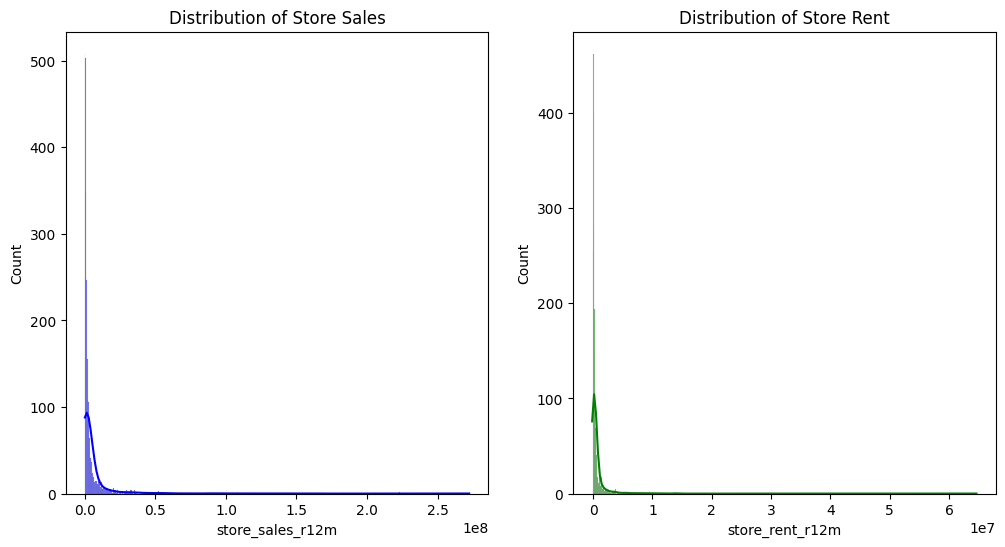

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for sales and rent
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['store_sales_r12m'].dropna(), kde=True, color='blue')
plt.title('Distribution of Store Sales')

plt.subplot(1, 2, 2)
sns.histplot(data['store_rent_r12m'].dropna(), kde=True, color='green')
plt.title('Distribution of Store Rent')
plt.show()


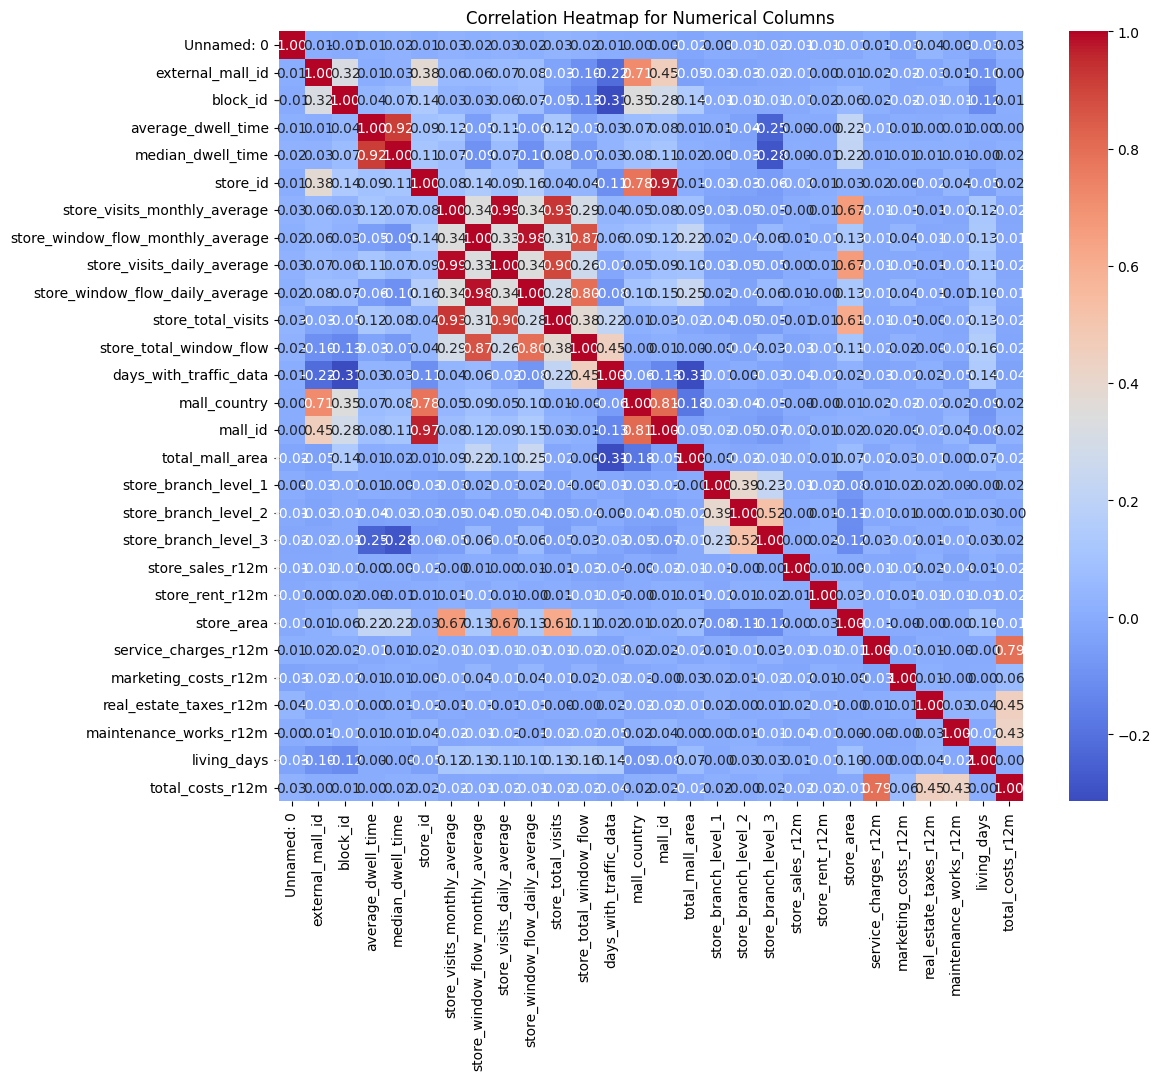

In [21]:
# Correlation heatmap
# Filter the DataFrame to include only numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for the numerical columns
correlation_matrix = numerical_data.corr()

# Generate a heatmap for the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

## bivariate analysis

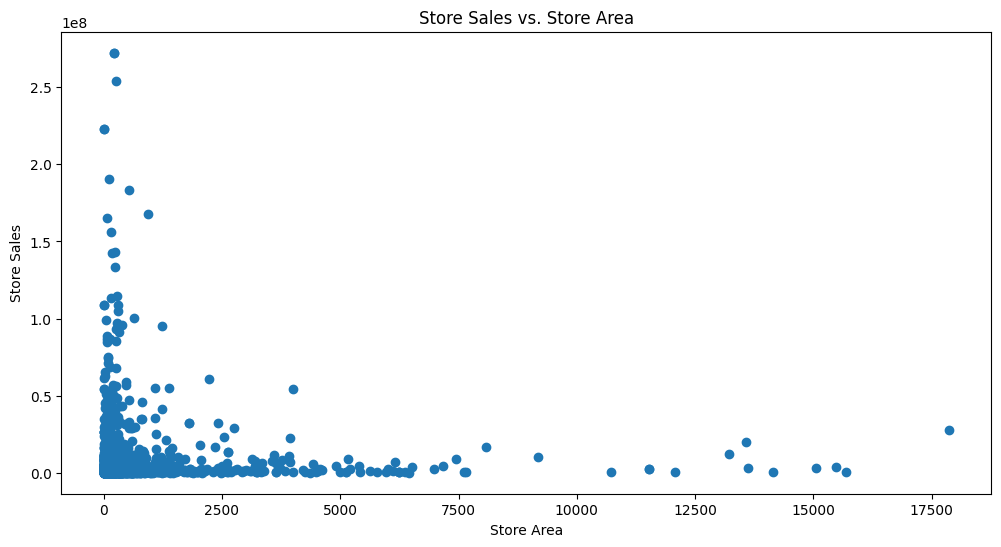

In [22]:
# Scatter plots to explore relationships
plt.figure(figsize=(12, 6))
plt.scatter(data['store_area'], data['store_sales_r12m'])
plt.xlabel('Store Area')
plt.ylabel('Store Sales')
plt.title('Store Sales vs. Store Area')
plt.show()


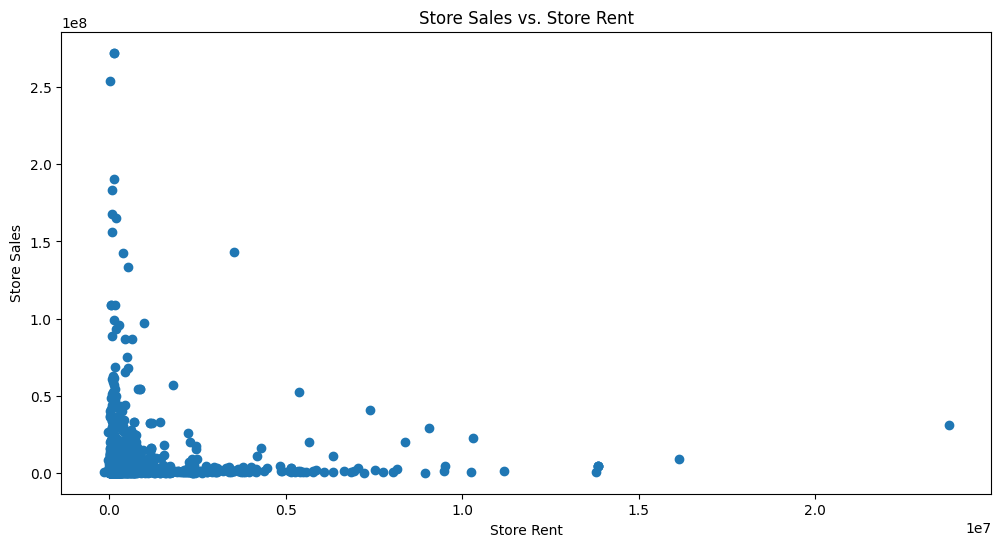

In [23]:
# Scatter plots to explore relationships
plt.figure(figsize=(12, 6))
plt.scatter(data['store_rent_r12m'], data['store_sales_r12m'])
plt.xlabel('Store Rent')
plt.ylabel('Store Sales')
plt.title('Store Sales vs. Store Rent')
plt.show()


## Analyzing the Top Categories in Branch Levels

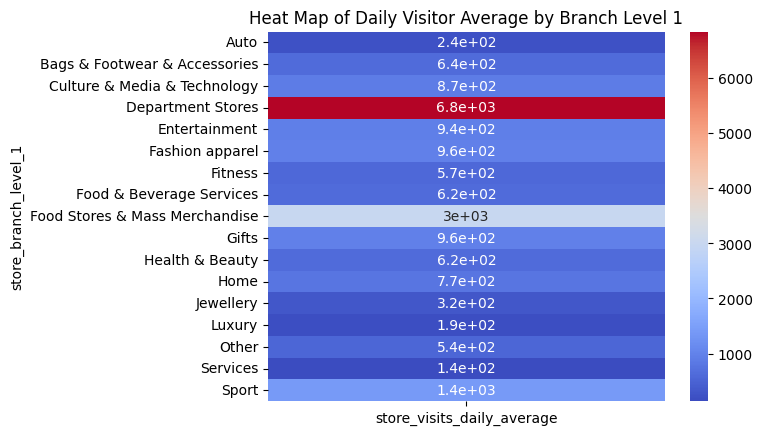

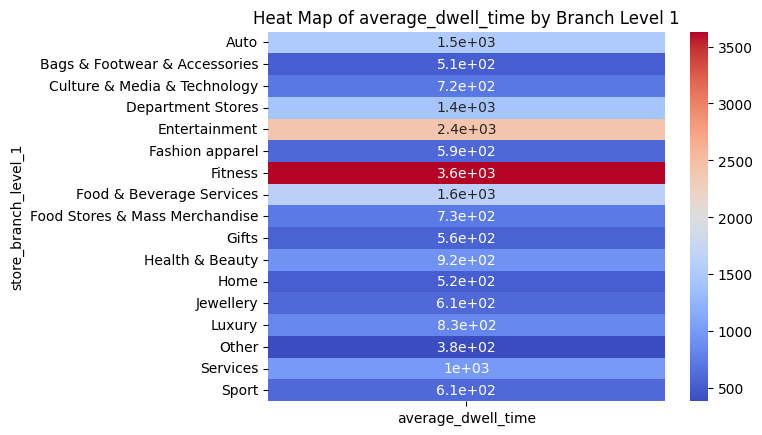

In [30]:
pivot_data = data.pivot_table(values='store_visits_daily_average', index='store_branch_level_1', aggfunc='mean')
sns.heatmap(pivot_data, cmap='coolwarm', annot=True)
plt.title('Heat Map of Daily Visitor Average by Branch Level 1')
plt.show()

pivot_data = data.pivot_table(values='average_dwell_time', index='store_branch_level_1', aggfunc='mean')
sns.heatmap(pivot_data, cmap='coolwarm', annot=True)
plt.title('Heat Map of average_dwell_time by Branch Level 1')
plt.show()

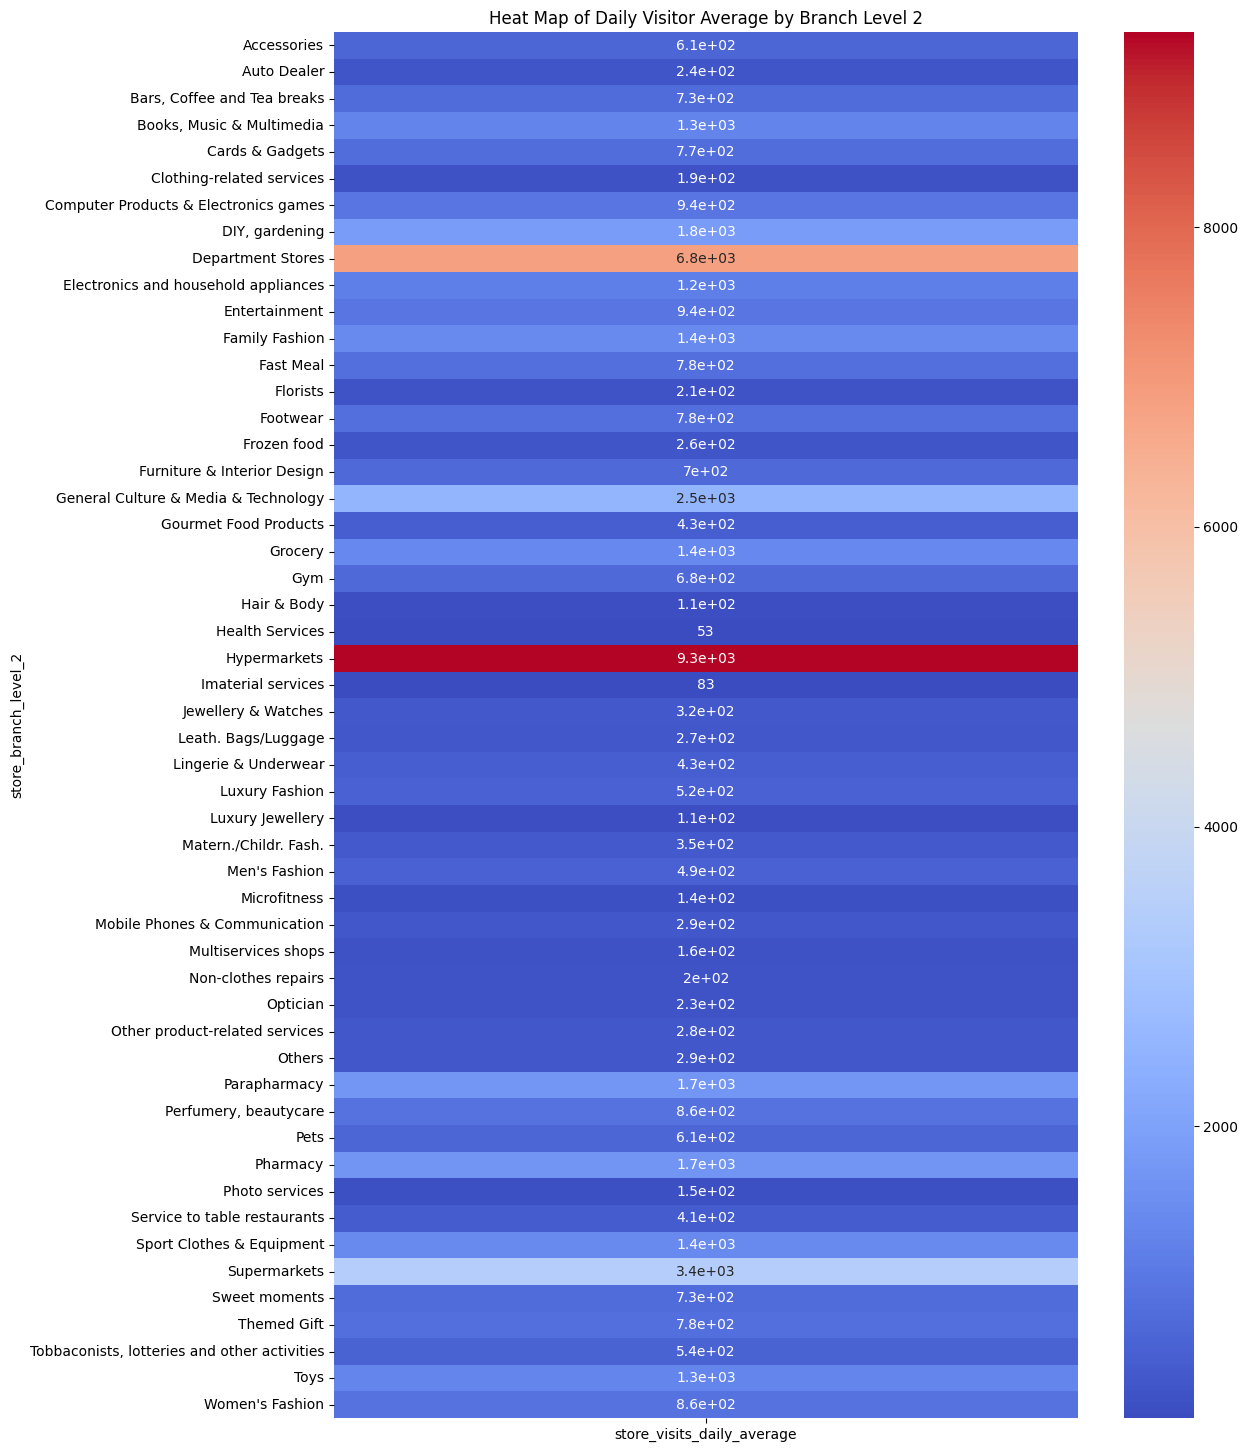

In [37]:
plt.figure(figsize=(12, 18))
pivot_data = data.pivot_table(values='store_visits_daily_average', index='store_branch_level_2', aggfunc='mean')
sns.heatmap(pivot_data, cmap='coolwarm', annot=True)
plt.title('Heat Map of Daily Visitor Average by Branch Level 2')
plt.show()

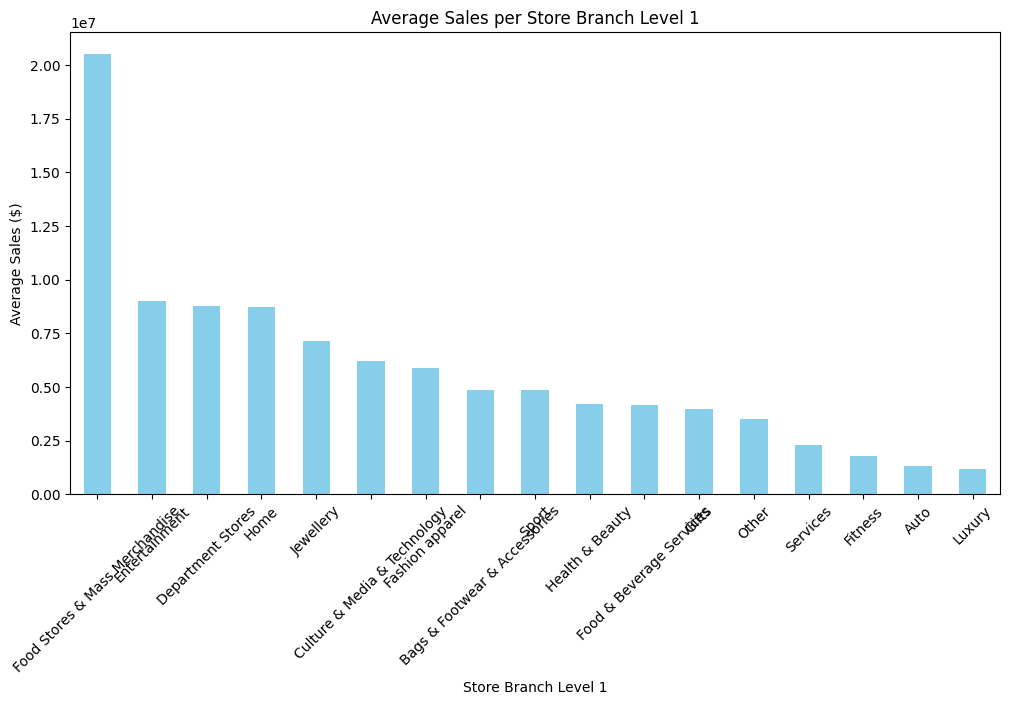

In [32]:
avg_sales_per_level = data.groupby('store_branch_level_1')['store_sales_r12m'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
avg_sales_per_level.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Sales per Store Branch Level 1')
plt.xlabel('Store Branch Level 1')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=45)
plt.show()

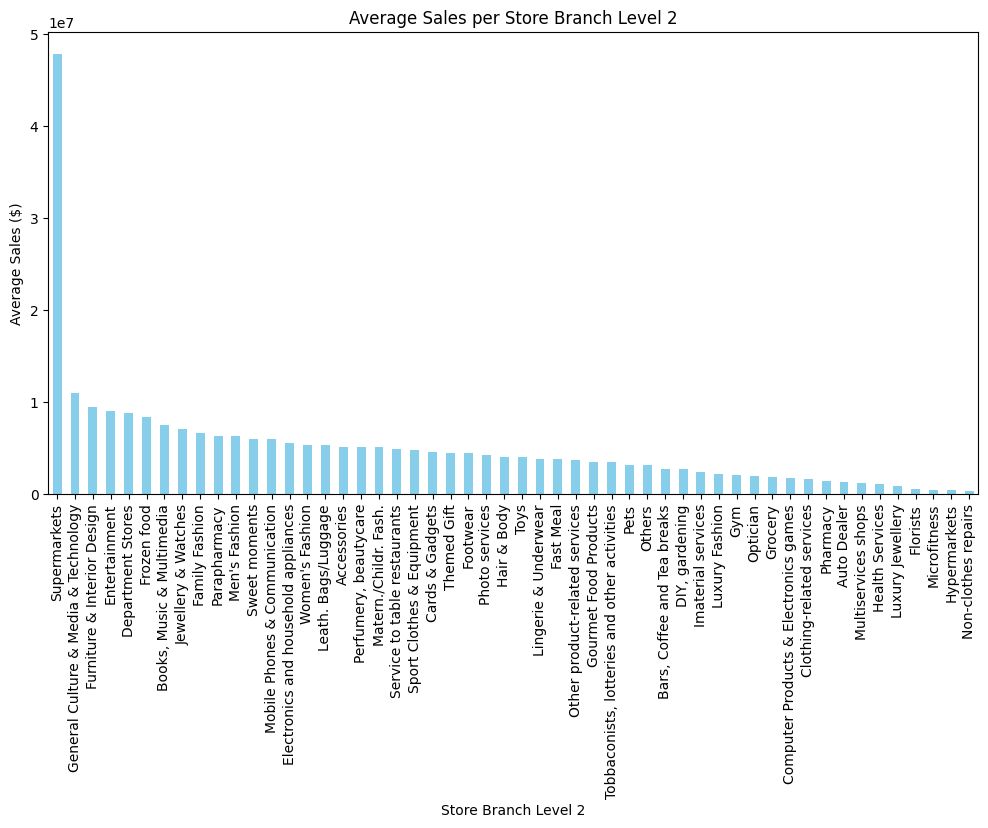

In [39]:
avg_sales_per_level = data.groupby('store_branch_level_2')['store_sales_r12m'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
avg_sales_per_level.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Sales per Store Branch Level 2')
plt.xlabel('Store Branch Level 2')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=90)
plt.show()

# feature engineering

## Encode Text Features (label encode)

In [40]:
from sklearn.preprocessing import LabelEncoder

le_mall_country = LabelEncoder()
le_store_branch_level_1 = LabelEncoder()
le_store_branch_level_2 = LabelEncoder()
le_store_branch_level_3 = LabelEncoder()


data['mall_country'] = le_mall_country.fit_transform(data['mall_country'])
data['store_branch_level_1'] = le_store_branch_level_1.fit_transform(data['store_branch_level_1'])
data['store_branch_level_2'] = le_store_branch_level_2.fit_transform(data['store_branch_level_2'])
data['store_branch_level_3'] = le_store_branch_level_3.fit_transform(data['store_branch_level_3'])

data

,Unnamed: 0,external_mall_id,block_id,average_dwell_time,median_dwell_time,store_id,store_visits_monthly_average,store_window_flow_monthly_average,store_visits_daily_average,store_window_flow_daily_average,...,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area,service_charges_r12m,marketing_costs_r12m,real_estate_taxes_r12m,maintenance_works_r12m
0,0,18,11273,249.520051,180.0,9257.0,9810.25,472952.50,509.62,24568.96,...,12,25,74,886377.00,NaN,104.0,25034.0,0.0,11957.0,6337.0
1,1,18,11271,190.005359,120.0,9443.0,4891.25,362107.00,254.09,18810.75,...,5,11,30,20883319.00,NaN,203.0,33465.0,0.0,11957.0,6337.0
2,2,17,4319,1325.216860,780.0,5697.0,1981.23,280719.08,70.37,9970.90,...,15,24,113,2339819.57,140492.0,72.0,18000.0,980.0,11957.0,6337.0
3,3,36,1201,621.422549,240.0,7179.0,29753.50,751216.75,1226.95,30978.01,...,7,47,22,1129538.00,89064.0,107.0,80035.0,5038.0,11957.0,24846.0
4,4,36,1212,217.833860,120.0,7288.0,6082.50,357884.00,253.44,14911.83,...,5,31,69,340091.00,2181010.0,208.0,69226.0,0.0,11957.0,6337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,3665,18,11264,255.038595,180.0,9407.0,14430.50,510585.25,749.64,26523.91,...,11,16,108,NaN,115075.0,175.0,72222.0,0.0,11957.0,6337.0
3642,3666,10,4706,294.363131,240.0,1171.0,3774.85,343803.85,134.08,12211.61,...,7,18,47,1469703.00,270969.0,44.5,7274.0,3841.0,44342.0,6337.0
3643,3667,17,4271,316.565137,180.0,5829.0,11781.00,1529175.00,418.45,54314.96,...,1,0,71,NaN,NaN,83.0,1466.0,0.0,11957.0,6337.0
3644,3668,10,4535,699.828561,540.0,1391.0,38032.69,196593.23,1350.89,6982.82,...,2,3,9,66591.00,126061.0,732.3,24474.0,4211.0,14051.0,6337.0


## Total Cost

In [58]:
data['total_costs_r12m'] = (data['service_charges_r12m'] +
                              data['marketing_costs_r12m'] +
                              data['real_estate_taxes_r12m'] +
                              data['maintenance_works_r12m'])


## Ratios

In [59]:
# total visit / window flow
data['visit_to_window_flow_ratio'] = data['store_total_visits'] / data['store_total_window_flow']

# sales / rent
data['sales_to_rent_ratio'] = data['store_sales_r12m'] / data['store_rent_r12m']

# sales / cost
data['sales_to_cost_ratio'] = data['store_sales_r12m'] / data['total_costs_r12m']


# EDA pt.2

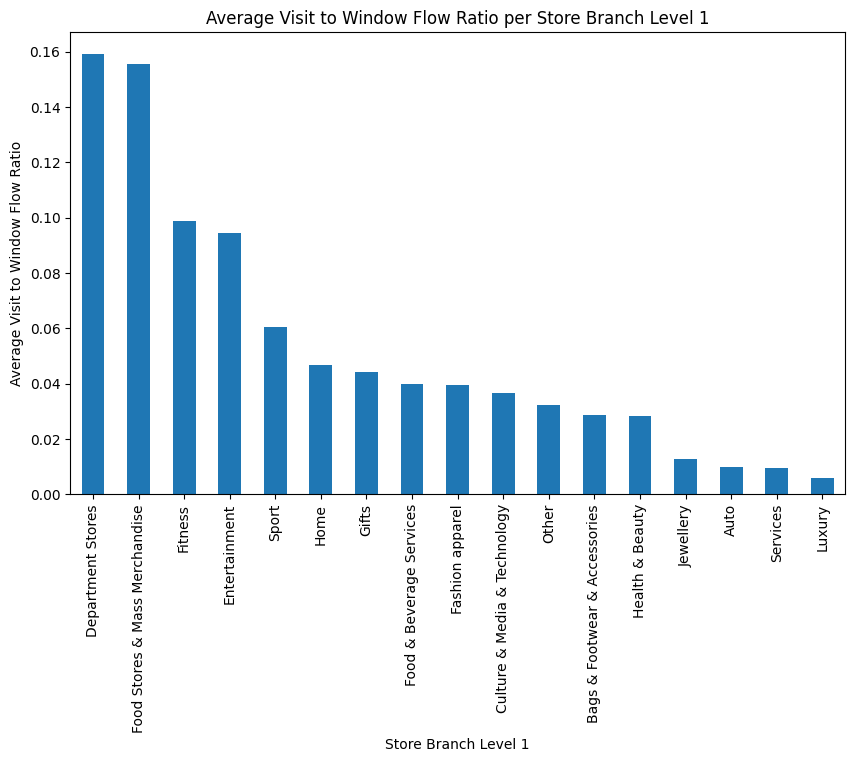

In [61]:
avg_visit_to_window_ratio = data.groupby('store_branch_level_1')['visit_to_window_flow_ratio'].mean()

plt.figure(figsize=(10, 6))
avg_visit_to_window_ratio.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Visit to Window Flow Ratio per Store Branch Level 1')
plt.xlabel('Store Branch Level 1')
plt.ylabel('Average Visit to Window Flow Ratio')
plt.xticks(rotation=90)
plt.show()

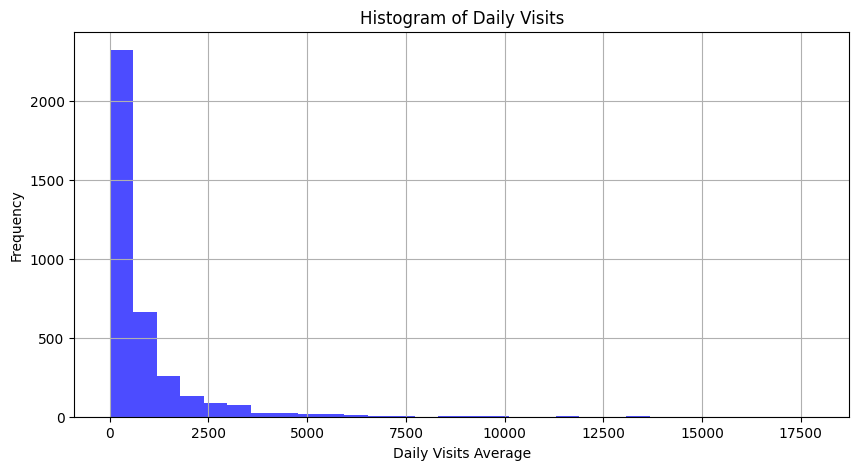

In [43]:
import matplotlib.pyplot as plt

# Plotting Daily Visits
plt.figure(figsize=(10, 5))
plt.hist(data['store_visits_daily_average'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Daily Visits')
plt.xlabel('Daily Visits Average')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

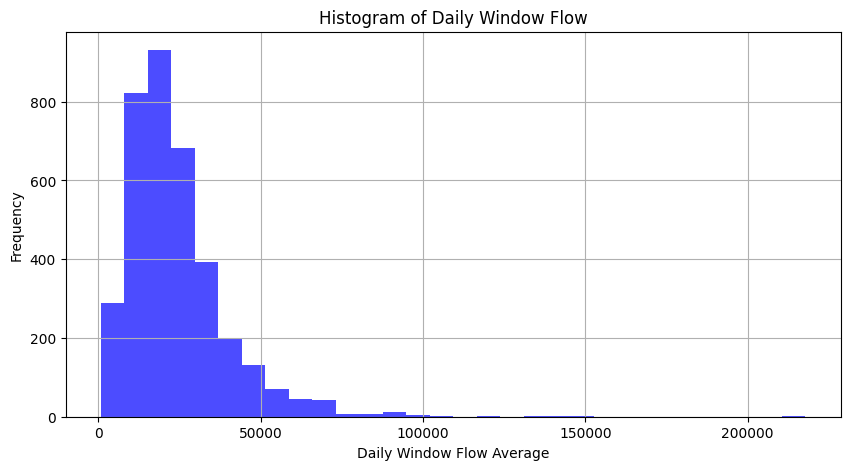

In [44]:
# Plotting Window Flow
plt.figure(figsize=(10, 5))
plt.hist(data['store_window_flow_daily_average'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Daily Window Flow')
plt.xlabel('Daily Window Flow Average')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

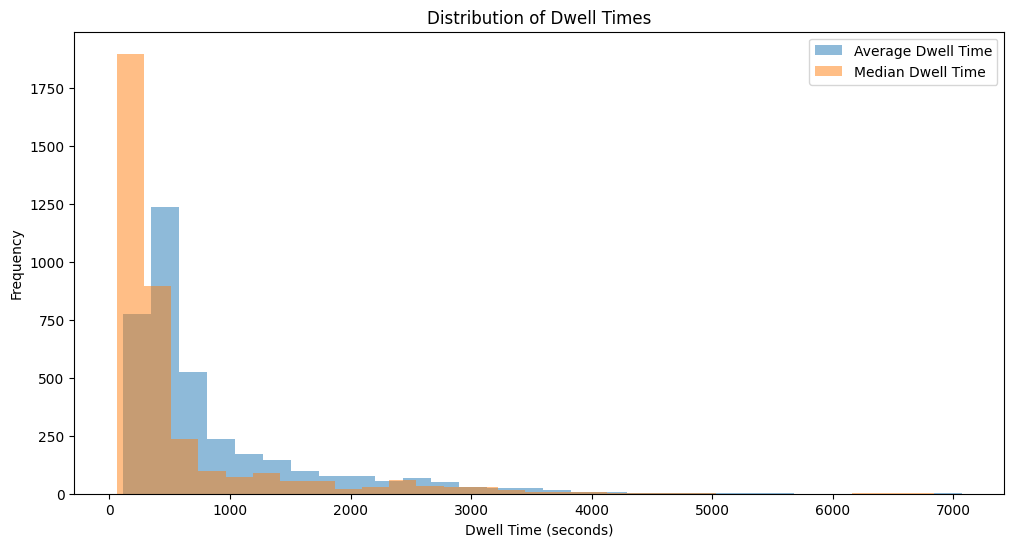

In [46]:

# Dwell Time Distribution
plt.figure(figsize=(12, 6))
plt.hist(data['average_dwell_time'], bins=30, alpha=0.5, label='Average Dwell Time')
plt.hist(data['median_dwell_time'], bins=30, alpha=0.5, label='Median Dwell Time')
plt.title('Distribution of Dwell Times')
plt.xlabel('Dwell Time (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


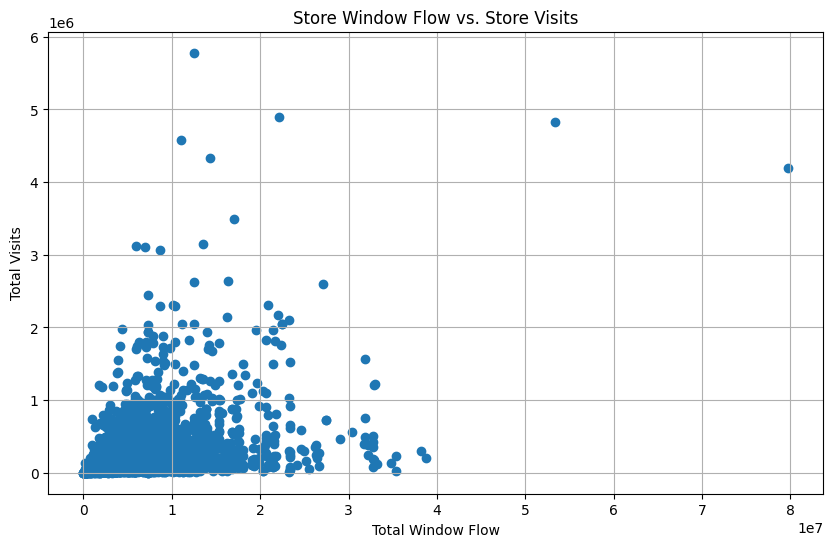

In [47]:

# Scatter Plot for Store Window Flow vs. Visits
plt.figure(figsize=(10, 6))
plt.scatter(data['store_total_window_flow'], data['store_total_visits'])
plt.title('Store Window Flow vs. Store Visits')
plt.xlabel('Total Window Flow')
plt.ylabel('Total Visits')
plt.grid(True)
plt.show()

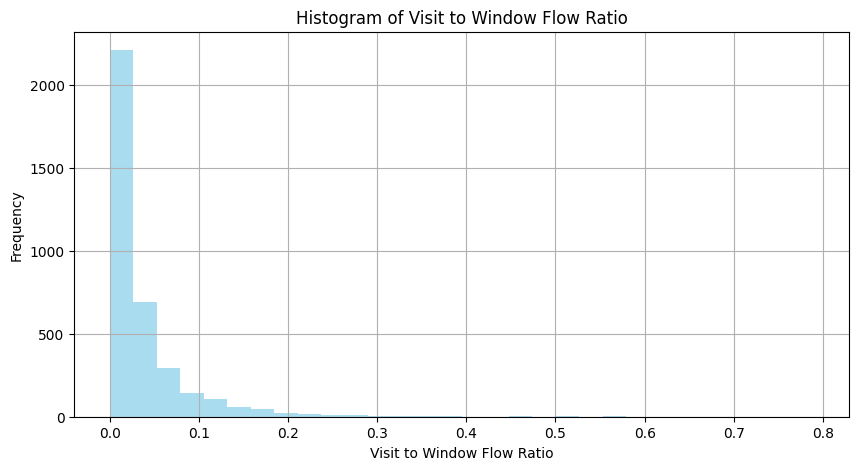

In [48]:

# Histogram of Visit to Window Flow Ratio
plt.figure(figsize=(10, 5))
plt.hist(data['visit_to_window_flow_ratio'], bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Visit to Window Flow Ratio')
plt.xlabel('Visit to Window Flow Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

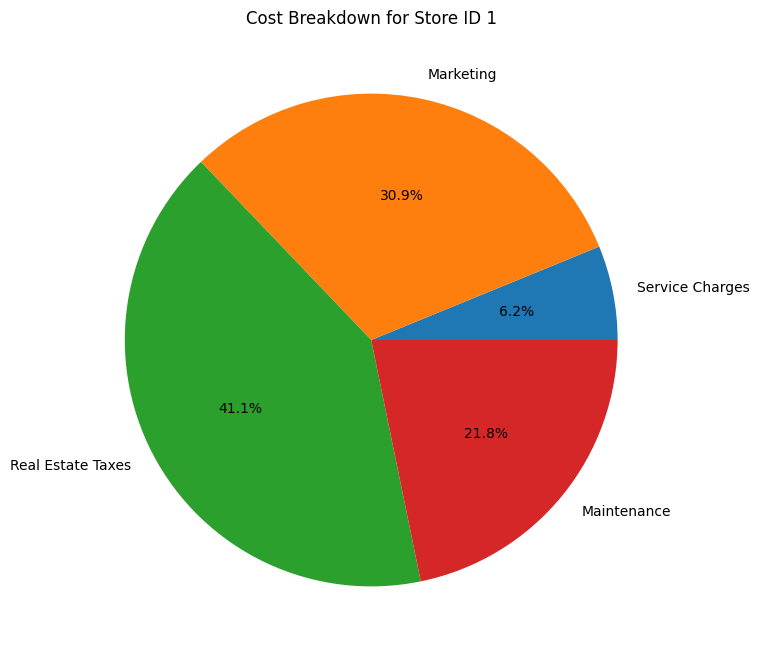

In [50]:
# Cost Breakdown Pie Chart for a specific store (example store_id = 1)
specific_store = data[data['store_id'] == 1]
cost_labels = [ 'Service Charges', 'Marketing', 'Real Estate Taxes',  'Maintenance']
cost_values = [
               specific_store['service_charges_r12m'].iloc[0],
               specific_store['marketing_costs_r12m'].iloc[0],
               specific_store['real_estate_taxes_r12m'].iloc[0],
               specific_store['maintenance_works_r12m'].iloc[0]]

plt.figure(figsize=(8, 8))
plt.pie(cost_values, labels=cost_labels, autopct='%1.1f%%')
plt.title('Cost Breakdown for Store ID 1')
plt.show()